In [1]:
import matplotlib.pyplot as plt
import joblib
import numpy as np
from sklearn.metrics import f1_score
from tqdm import notebook

In [2]:
[predictions_list, labels_all_deg_seed, labels_all_simba_seed, labels_all_simba_seed2] = \
    np.load('/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid_manuscript/predictions_20seeds.npy', allow_pickle=True)
with open('/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid_manuscript/ALL_test_data.sav', 'rb') as fr:
    [data_test, targets_test] = joblib.load(fr)

In [3]:
micro_deg_other = []
micro_simba_other = []
micro_asoid_other = []

micro_deg = []
micro_simba = []
micro_asoid = []

macro_deg_other = []
macro_simba_other = []
macro_asoid_other = []

macro_deg = []
macro_simba = []
macro_asoid = []

weighted_deg_other = []
weighted_simba_other = []
weighted_asoid_other = []


f1_deg_other = []
f1_simba_other = []
f1_asoid_other = []

f1_deg = []
f1_simba = []
f1_asoid = []


for s in notebook.tqdm(range(len(labels_all_deg_seed))):

    micro_deg_other.append(f1_score(targets_test,
                              labels_all_deg_seed[s], average='micro'))
    micro_simba_other.append(f1_score(targets_test,
                                labels_all_simba_seed2[s], average='micro'))
    micro_asoid_other.append(f1_score(targets_test,
                                predictions_list[-1][s], average='micro'))

    micro_deg.append(f1_score(targets_test[(targets_test<3) & (labels_all_deg_seed[s]<3)],
                              labels_all_deg_seed[s][(targets_test<3) & (labels_all_deg_seed[s]<3)],
                              average='micro'))
    micro_simba.append(f1_score(targets_test[(targets_test<3) & (labels_all_simba_seed2[s]<3)],
                                labels_all_simba_seed2[s][(targets_test<3) & (labels_all_simba_seed2[s]<3)],
                                average='micro'))
    micro_asoid.append(f1_score(targets_test[(targets_test<3) & (predictions_list[-1][s]<3)],
                                predictions_list[-1][s][(targets_test<3) & (predictions_list[-1][s]<3)],
                                average='micro'))

    macro_deg_other.append(f1_score(targets_test,
                              labels_all_deg_seed[s], average='macro'))
    macro_simba_other.append(f1_score(targets_test,
                                labels_all_simba_seed2[s], average='macro'))
    macro_asoid_other.append(f1_score(targets_test,
                                predictions_list[-1][s], average='macro'))

    macro_deg.append(f1_score(targets_test[(targets_test<3) & (labels_all_deg_seed[s]<3)],
                              labels_all_deg_seed[s][(targets_test<3) & (labels_all_deg_seed[s]<3)],
                              average='macro'))
    macro_simba.append(f1_score(targets_test[(targets_test<3) & (labels_all_simba_seed2[s]<3)],
                                labels_all_simba_seed2[s][(targets_test<3) & (labels_all_simba_seed2[s]<3)],
                                average='macro'))
    macro_asoid.append(f1_score(targets_test[(targets_test<3) & (predictions_list[-1][s]<3)],
                                predictions_list[-1][s][(targets_test<3) & (predictions_list[-1][s]<3)],
                                average='macro'))


    weighted_deg_other.append(f1_score(targets_test,
                              labels_all_deg_seed[s], average='weighted'))
    weighted_simba_other.append(f1_score(targets_test,
                                labels_all_simba_seed2[s], average='weighted'))
    weighted_asoid_other.append(f1_score(targets_test,
                                predictions_list[-1][s], average='weighted'))


    f1_deg_other.append(f1_score(targets_test,
                              labels_all_deg_seed[s], average=None))
    f1_simba_other.append(f1_score(targets_test,
                                labels_all_simba_seed2[s], average=None))
    f1_asoid_other.append(f1_score(targets_test,
                                predictions_list[-1][s], average=None))

    f1_deg.append(f1_score(targets_test[(targets_test<3) & (labels_all_deg_seed[s]<3)],
                              labels_all_deg_seed[s][(targets_test<3) & (labels_all_deg_seed[s]<3)], average=None))
    f1_simba.append(f1_score(targets_test[(targets_test<3) & (labels_all_simba_seed2[s]<3)],
                                labels_all_simba_seed2[s][(targets_test<3) & (labels_all_simba_seed2[s]<3)], average=None))
    f1_asoid.append(f1_score(targets_test[(targets_test<3) & (predictions_list[-1][s]<3)],
                                predictions_list[-1][s][(targets_test<3) & (predictions_list[-1][s]<3)], average=None))
# stacking different metric types
micro_other = [np.mean(micro_simba_other), np.mean(micro_deg_other), np.mean(micro_asoid_other)]
micro = [np.mean(micro_simba), np.mean(micro_deg), np.mean(micro_asoid)]
macro_other = [np.mean(macro_simba_other), np.mean(macro_deg_other), np.mean(macro_asoid_other)]
macro = [np.mean(macro_simba), np.mean(macro_deg), np.mean(macro_asoid)]
f1_other = [np.mean(f1_simba_other, axis=0), np.mean(f1_deg_other, axis=0), np.mean(f1_asoid_other, axis=0)]
f1 = [np.mean(f1_simba, axis=0), np.mean(f1_deg, axis=0), np.mean(f1_asoid, axis=0)]

# put all in one list for figure
perf_metrics = [
    micro_other, micro,
    macro_other, macro,
    f1_other, f1,
               ]

# stacking different metric types (stdev)
micro_other_std = [np.std(micro_simba_other), np.std(micro_deg_other), np.std(micro_asoid_other)]
micro_std = [np.std(micro_simba), np.std(micro_deg), np.std(micro_asoid)]
macro_other_std = [np.std(macro_simba_other), np.std(macro_deg_other), np.std(macro_asoid_other)]
macro_std = [np.std(macro_simba), np.std(macro_deg), np.std(macro_asoid)]
f1_other_std = [np.std(f1_simba_other, axis=0), np.std(f1_deg_other, axis=0), np.std(f1_asoid_other, axis=0)]
f1_std = [np.std(f1_simba, axis=0), np.std(f1_deg, axis=0), np.std(f1_asoid, axis=0)]

# put all in one list for figure (stdev)
perf_metrics_std = [
    micro_other_std, micro_std,
    macro_other_std, macro_std,
    f1_other_std, f1_std,
               ]

  0%|          | 0/20 [00:00<?, ?it/s]

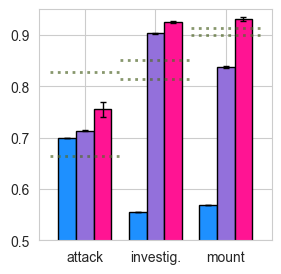

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
width=0.25
count = 5
# baseline
ax.hlines(0.664, -.5, .5, ls=':', lw=2, color='darkolivegreen', alpha=0.7)
ax.hlines(0.814, .5, 1.5, ls=':', lw=2, color='darkolivegreen', alpha=0.7)
ax.hlines(0.900, 1.5, 2.5, ls=':', lw=2, color='darkolivegreen', alpha=0.7)
# winner
ax.hlines(0.827, -.5, .5, ls=':', lw=2, color='darkolivegreen', alpha=0.7)
ax.hlines(0.852, .5, 1.5, ls=':', lw=2, color='darkolivegreen', alpha=0.7)
ax.hlines(0.913, 1.5, 2.5, ls=':', lw=2, color='darkolivegreen', alpha=0.7)
# opensource algos
ax.bar(np.arange(len(perf_metrics[count][0])) - width ,
       perf_metrics[count][0],
       width, color='dodgerblue', edgecolor='k')
ax.bar(np.arange(len(perf_metrics[count][1])),
       perf_metrics[count][1],
       width, color='mediumpurple', edgecolor='k')
ax.bar(np.arange(len(perf_metrics[count][2])) + width,
       perf_metrics[count][2],
       width, color='deeppink', edgecolor='k')

ax.errorbar(np.arange(len(perf_metrics[count][0])) - width,
            y=perf_metrics[count][0],
            yerr=3*perf_metrics_std[count][0],
            capsize=2, elinewidth=1,
            ls='none', color='k')
ax.errorbar(np.arange(len(perf_metrics[count][1])),
            y=perf_metrics[count][1],
            yerr=3*perf_metrics_std[count][1],
            capsize=2, elinewidth=1,
            ls='none', color='k')
ax.errorbar(np.arange(len(perf_metrics[count][2])) + width,
            y=perf_metrics[count][2],
            yerr=3*perf_metrics_std[count][2],
            capsize=2, elinewidth=1,
            ls='none', color='k')

ax.set_xticks(np.arange(0, 3))
ax.set_xticklabels(['attack', 'investig.', 'mount'])
ax.set_yticks(np.arange(0.5, 0.95, 0.1))
ax.set_ylim([0.5, 0.95])

plt.show()
